In [1]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.

In [2]:
#pip install easyocr

In [3]:
import glob
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np

In [4]:
imgs = glob.glob('./crop/*.png')

In [5]:
ocr = PaddleOCR(use_angle_cls=True, lang='ch') # need to run only once to download and load model into memory

[2022/09/27 04:03:32] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\aravi/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\aravi/.paddleocr/whl\\det\\ch\\ch_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_

In [6]:
#!pip install paddleocr

In [7]:
def img_preprocess(rgb_img):
    # image noise removal
#     im_nr = cv2.fastNlMeansDenoisingColored(rgb_img, None, 10, 10, 7, 15)
    
    # image increase contrast/brightness
    alpha = 1.5 # Contrast control (1.0-3.0)
    beta = 0 # Brightness control (0-100)
    adjusted = cv2.convertScaleAbs(rgb_img, alpha=alpha, beta=beta)

    # binarising the image
#     im_gray = cv.imread('image.png', cv.IMREAD_GRAYSCALE)
    gray_adjusted = cv2.cvtColor(adjusted, cv2.COLOR_RGB2GRAY)
    (thresh, im_bw) = cv2.threshold(gray_adjusted, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    processed_img = cv2.threshold(gray_adjusted, thresh, 255, cv2.THRESH_BINARY)[1]
    
    return processed_img

In [8]:
# load the input image and convert it to grayscale
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# threshold the image using Otsu's thresholding method
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(thresh)
plt.show()

NameError: name 'img_path' is not defined

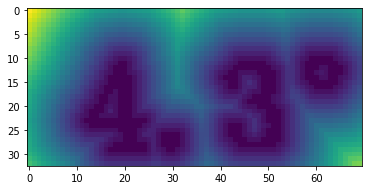

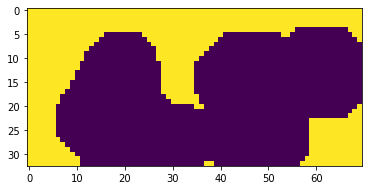

In [11]:
# apply a distance transform which calculates the distance to the
# closest zero pixel for each pixel in the input image
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
# normalize the distance transform such that the distances lie in
# the range [0, 1] and then convert the distance transform back to
# an unsigned 8-bit integer in the range [0, 255]
dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
dist = (dist * 255).astype("uint8")
plt.imshow(dist)
plt.show()

# threshold the distance transform using Otsu's method
dist = cv2.threshold(dist, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(dist)
plt.show()

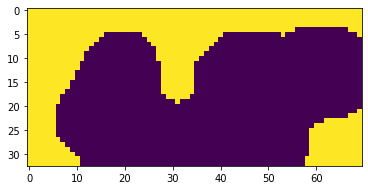

In [12]:
# apply an "opening" morphological operation to disconnect components
# in the image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
opening = cv2.morphologyEx(dist, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.show()

In [19]:
# find contours in the opening image, then initialize the list of
# contours which belong to actual characters that we will be OCR'ing
cnts = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
chars = []

# loop over the contours
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # check if contour is at least 35px wide and 100px tall, and if
    # so, consider the contour a digit
    if w >= 35 and h >= 100:
        chars.append(c)

In [20]:
chars

[]

In [22]:
# # compute the convex hull of the characters
# chars = np.vstack([chars[i] for i in range(0, len(chars))])
# hull = cv2.convexHull(chars)

# # allocate memory for the convex hull mask, draw the convex hull on
# # the image, and then enlarge it via a dilation
# mask = np.zeros(image.shape[:2], dtype="uint8")
# cv2.drawContours(mask, [hull], -1, 255, -1)
# mask = cv2.dilate(mask, None, iterations=2)
# plt.imshow(mask)
# plt.show()

# # take the bitwise of the opening image and the mask to reveal *just*
# # the characters in the image
# final = cv2.bitwise_and(opening, opening, mask=mask)

# plt.imshow(final)
# plt.show()

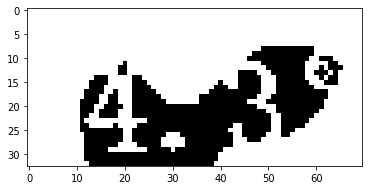

In [25]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dilated_img = cv2.dilate(gray, np.ones((7, 7), np.uint8))
bg_img = cv2.medianBlur(dilated_img, 21)
diff_img = 255 - cv2.absdiff(gray, bg_img)
norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255,
                         norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
work_img = cv2.threshold(norm_img, 0, 255, cv2.THRESH_OTSU)[1]
plt.imshow(work_img,cmap='gray')
plt.show()

./crop\1.png
(165, 351, 3)


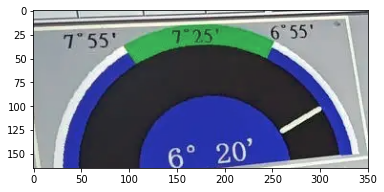

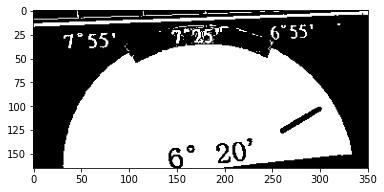

[2022/09/27 04:03:51] ppocr DEBUG: dt_boxes num : 5, elapse : 0.10000205039978027
[2022/09/27 04:03:51] ppocr DEBUG: cls num  : 5, elapse : 0.12486624717712402
[2022/09/27 04:03:52] ppocr DEBUG: rec_res num  : 5, elapse : 1.0280582904815674

[[[244.0, 12.0], [292.0, 9.0], [294.0, 32.0], [245.0, 34.0]], ('6°55', 0.932558536529541)]

[[[29.0, 21.0], [84.0, 21.0], [84.0, 43.0], [29.0, 43.0]], ('7°55', 0.8045386075973511)]

[[[143.0, 18.0], [192.0, 15.0], [193.0, 35.0], [144.0, 37.0]], ("7'25", 0.6945633888244629)]

[[[138.0, 143.0], [173.0, 138.0], [175.0, 160.0], [140.0, 164.0]], ('6°', 0.9618548154830933)]

[[[184.0, 137.0], [231.0, 130.0], [235.0, 157.0], [188.0, 164.0]], ('20"', 0.7464556097984314)]

[2022/09/27 04:03:52] ppocr DEBUG: dt_boxes num : 3, elapse : 0.09085869789123535
[2022/09/27 04:03:52] ppocr DEBUG: cls num  : 3, elapse : 0.07180237770080566
[2022/09/27 04:03:53] ppocr DEBUG: rec_res num  : 3, elapse : 0.6266822814941406

[[[245.0, 14.0], [293.0, 10.0], [295.0, 30.0], 

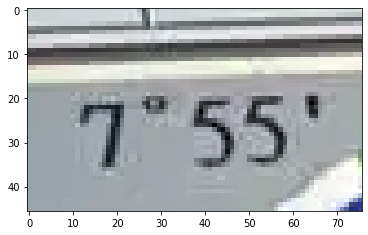

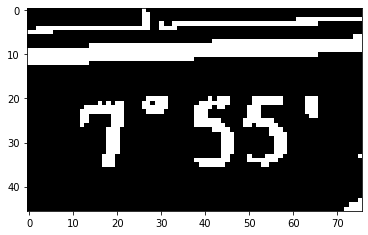

[2022/09/27 04:03:53] ppocr DEBUG: dt_boxes num : 1, elapse : 0.02395176887512207
[2022/09/27 04:03:53] ppocr DEBUG: cls num  : 1, elapse : 0.05047965049743652
[2022/09/27 04:03:54] ppocr DEBUG: rec_res num  : 1, elapse : 0.3986794948577881

[[[6.0, 12.0], [71.0, 12.0], [71.0, 43.0], [6.0, 43.0]], ('7"55\'', 0.6697455048561096)]

[2022/09/27 04:03:54] ppocr DEBUG: dt_boxes num : 1, elapse : 0.025008201599121094
[2022/09/27 04:03:54] ppocr DEBUG: cls num  : 1, elapse : 0.0355372428894043
[2022/09/27 04:03:56] ppocr DEBUG: rec_res num  : 1, elapse : 1.6868805885314941

[[[31.0, 19.0], [61.0, 15.0], [64.0, 38.0], [34.0, 42.0]], ('55', 0.9487500190734863)]

./crop\1_num2.png
(40, 61, 3)


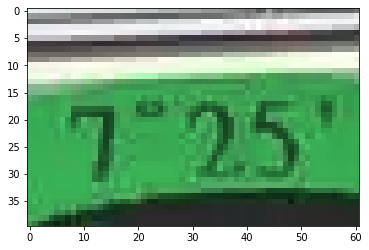

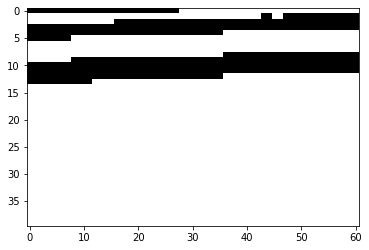

[2022/09/27 04:03:56] ppocr DEBUG: dt_boxes num : 0, elapse : 0.015415668487548828
[2022/09/27 04:03:56] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:03:56] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

[2022/09/27 04:03:56] ppocr DEBUG: dt_boxes num : 0, elapse : 0.020936965942382812
[2022/09/27 04:03:56] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:03:56] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

./crop\1_num3.png
(31, 66, 3)


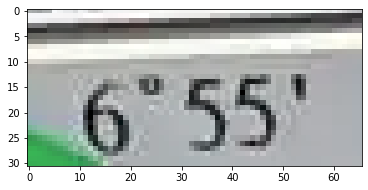

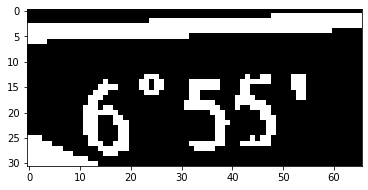

[2022/09/27 04:03:57] ppocr DEBUG: dt_boxes num : 1, elapse : 0.017797470092773438
[2022/09/27 04:03:57] ppocr DEBUG: cls num  : 1, elapse : 0.05695033073425293
[2022/09/27 04:03:58] ppocr DEBUG: rec_res num  : 1, elapse : 1.1878430843353271

[[[1.0, 10.0], [57.0, 5.0], [60.0, 30.0], [4.0, 30.0]], ("6°55'", 0.7903827428817749)]

[2022/09/27 04:03:58] ppocr DEBUG: dt_boxes num : 1, elapse : 0.027607202529907227
[2022/09/27 04:03:58] ppocr DEBUG: cls num  : 1, elapse : 0.053045034408569336
[2022/09/27 04:03:59] ppocr DEBUG: rec_res num  : 1, elapse : 1.112839698791504

[[[5.0, 7.0], [59.0, 7.0], [59.0, 30.0], [5.0, 30.0]], ("6°55'", 0.8732779622077942)]

./crop\1_num4.png
(42, 106, 3)


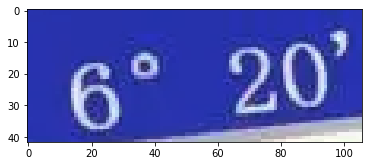

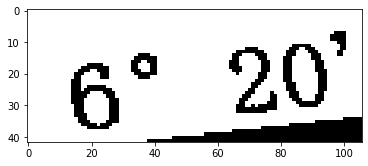

[2022/09/27 04:04:00] ppocr DEBUG: dt_boxes num : 2, elapse : 0.01643204689025879
[2022/09/27 04:04:00] ppocr DEBUG: cls num  : 2, elapse : 0.049576759338378906
[2022/09/27 04:04:00] ppocr DEBUG: rec_res num  : 2, elapse : 0.4494032859802246

[[[57.0, 10.0], [100.0, 5.0], [102.0, 35.0], [59.0, 40.0]], ('20', 0.8953108787536621)]

[[[9.0, 15.0], [46.0, 8.0], [50.0, 35.0], [13.0, 41.0]], ('6°', 0.9874763488769531)]

[2022/09/27 04:04:00] ppocr DEBUG: dt_boxes num : 1, elapse : 0.01797795295715332
[2022/09/27 04:04:00] ppocr DEBUG: cls num  : 1, elapse : 0.02567911148071289
[2022/09/27 04:04:01] ppocr DEBUG: rec_res num  : 1, elapse : 0.20738649368286133

[[[9.0, 13.0], [101.0, 3.0], [103.0, 36.0], [12.0, 41.0]], ("6° 20'", 0.8150936961174011)]

./crop\2.png
(157, 280, 3)


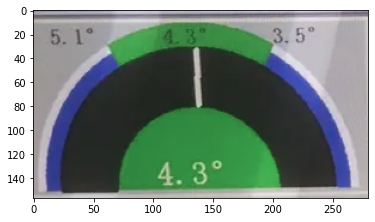

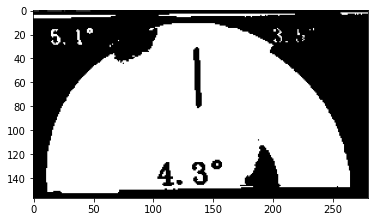

[2022/09/27 04:04:01] ppocr DEBUG: dt_boxes num : 4, elapse : 0.07653141021728516
[2022/09/27 04:04:01] ppocr DEBUG: cls num  : 4, elapse : 0.09132575988769531
[2022/09/27 04:04:05] ppocr DEBUG: rec_res num  : 4, elapse : 4.190245151519775

[[[195.0, 12.0], [236.0, 8.0], [238.0, 30.0], [197.0, 34.0]], ('3.5°', 0.8776506185531616)]

[[[10.0, 13.0], [51.0, 10.0], [52.0, 30.0], [12.0, 33.0]], ('5.1°', 0.9521471261978149)]

[[[108.0, 14.0], [145.0, 14.0], [145.0, 28.0], [108.0, 28.0]], ('4.3°', 0.7487821578979492)]

[[[99.0, 124.0], [161.0, 119.0], [163.0, 148.0], [102.0, 153.0]], ('4.3°', 0.890224814414978)]

[2022/09/27 04:04:05] ppocr DEBUG: dt_boxes num : 1, elapse : 0.1123816967010498
[2022/09/27 04:04:05] ppocr DEBUG: cls num  : 1, elapse : 0.03320884704589844
[2022/09/27 04:04:07] ppocr DEBUG: rec_res num  : 1, elapse : 1.6831340789794922

[[[100.0, 125.0], [160.0, 119.0], [162.0, 144.0], [103.0, 151.0]], ('4.3°', 0.8780475854873657)]

./crop\2_num11.png
(31, 52, 3)


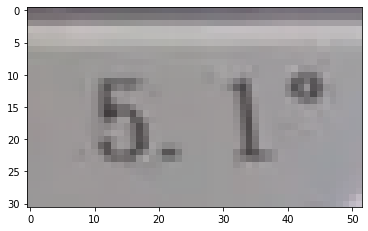

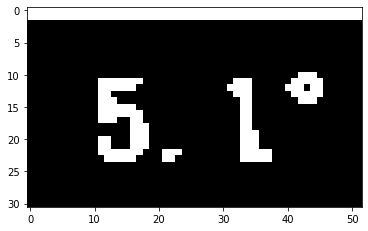

[2022/09/27 04:04:08] ppocr DEBUG: dt_boxes num : 1, elapse : 0.01932072639465332
[2022/09/27 04:04:08] ppocr DEBUG: cls num  : 1, elapse : 0.042795419692993164
[2022/09/27 04:04:09] ppocr DEBUG: rec_res num  : 1, elapse : 1.6958541870117188

[[[5.0, 6.0], [51.0, 1.0], [51.0, 28.0], [7.0, 30.0]], ('5.1°', 0.9013509154319763)]

[2022/09/27 04:04:09] ppocr DEBUG: dt_boxes num : 0, elapse : 0.02127671241760254
[2022/09/27 04:04:09] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:04:09] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

./crop\2_num22.png
(27, 49, 3)


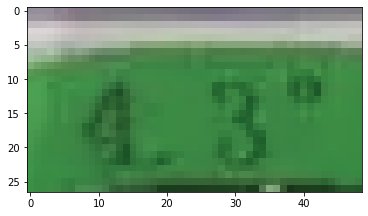

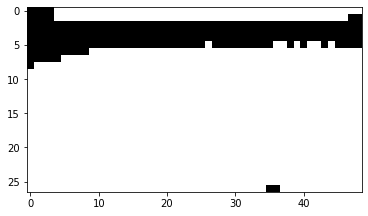

[2022/09/27 04:04:10] ppocr DEBUG: dt_boxes num : 0, elapse : 0.017162561416625977
[2022/09/27 04:04:10] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:04:10] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

[2022/09/27 04:04:10] ppocr DEBUG: dt_boxes num : 0, elapse : 0.04088878631591797
[2022/09/27 04:04:10] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:04:10] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

./crop\2_num33.png
(31, 51, 3)


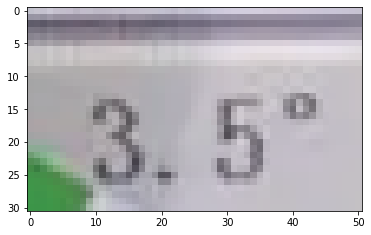

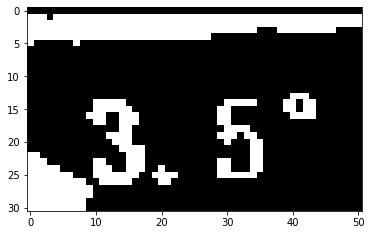

[2022/09/27 04:04:11] ppocr DEBUG: dt_boxes num : 1, elapse : 0.016370296478271484
[2022/09/27 04:04:11] ppocr DEBUG: cls num  : 1, elapse : 0.034857749938964844
[2022/09/27 04:04:12] ppocr DEBUG: rec_res num  : 1, elapse : 1.6997466087341309

[[[4.0, 7.0], [47.0, 3.0], [48.0, 29.0], [6.0, 30.0]], ('3.5°', 0.8450255990028381)]

[2022/09/27 04:04:12] ppocr DEBUG: dt_boxes num : 0, elapse : 0.01566028594970703
[2022/09/27 04:04:12] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:04:12] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

./crop\2_num44.png
(33, 70, 3)


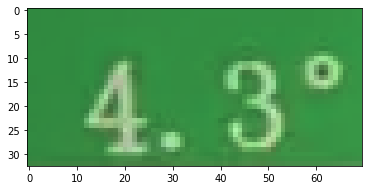

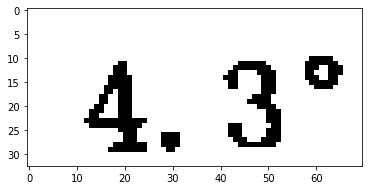

[2022/09/27 04:04:13] ppocr DEBUG: dt_boxes num : 1, elapse : 0.023710012435913086
[2022/09/27 04:04:13] ppocr DEBUG: cls num  : 1, elapse : 0.03987312316894531
[2022/09/27 04:04:15] ppocr DEBUG: rec_res num  : 1, elapse : 1.6924562454223633

[[[8.0, 9.0], [67.0, 6.0], [68.0, 29.0], [10.0, 31.0]], ('4.3°', 0.9784953594207764)]

[2022/09/27 04:04:15] ppocr DEBUG: dt_boxes num : 1, elapse : 0.017418861389160156
[2022/09/27 04:04:15] ppocr DEBUG: cls num  : 1, elapse : 0.05212140083312988
[2022/09/27 04:04:16] ppocr DEBUG: rec_res num  : 1, elapse : 1.6961584091186523

[[[7.0, 9.0], [69.0, 6.0], [69.0, 32.0], [9.0, 32.0]], ('4.3°', 0.9556106925010681)]

./crop\m1.png
(40, 79, 3)


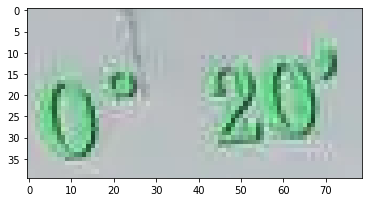

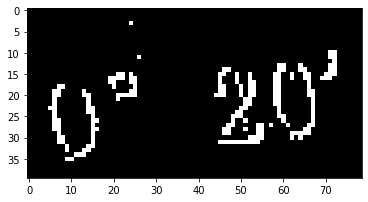

[2022/09/27 04:04:17] ppocr DEBUG: dt_boxes num : 2, elapse : 0.024060487747192383
[2022/09/27 04:04:17] ppocr DEBUG: cls num  : 2, elapse : 0.06574440002441406
[2022/09/27 04:04:20] ppocr DEBUG: rec_res num  : 2, elapse : 3.181304693222046

[[[33.0, 12.0], [71.0, 8.0], [73.0, 33.0], [35.0, 37.0]], ('20', 0.9888406991958618)]

[2022/09/27 04:04:20] ppocr DEBUG: dt_boxes num : 2, elapse : 0.03600716590881348
[2022/09/27 04:04:20] ppocr DEBUG: cls num  : 2, elapse : 0.06449747085571289
[2022/09/27 04:04:22] ppocr DEBUG: rec_res num  : 2, elapse : 1.8536386489868164

[[[38.0, 11.0], [72.0, 7.0], [75.0, 33.0], [41.0, 37.0]], ('20', 0.9936379194259644)]

./crop\m2.png
(36, 88, 3)


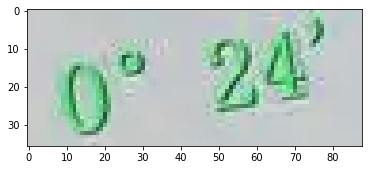

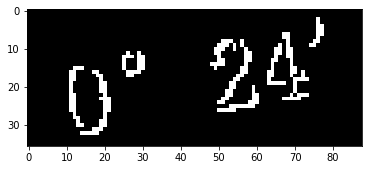

[2022/09/27 04:04:23] ppocr DEBUG: dt_boxes num : 2, elapse : 0.01706981658935547
[2022/09/27 04:04:23] ppocr DEBUG: cls num  : 2, elapse : 0.08159041404724121
[2022/09/27 04:04:26] ppocr DEBUG: rec_res num  : 2, elapse : 3.358633279800415

[[[44.0, 6.0], [78.0, 6.0], [78.0, 28.0], [44.0, 28.0]], ('24', 0.993682861328125)]

[[[8.0, 14.0], [32.0, 11.0], [33.0, 29.0], [9.0, 32.0]], ('0', 0.5926551222801208)]

[2022/09/27 04:04:26] ppocr DEBUG: dt_boxes num : 0, elapse : 0.0341341495513916
[2022/09/27 04:04:26] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:04:26] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

./crop\m3.png
(46, 69, 3)


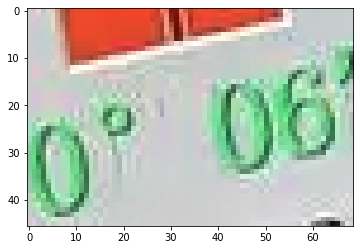

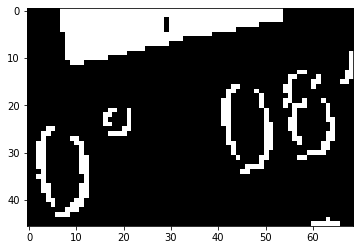

[2022/09/27 04:04:27] ppocr DEBUG: dt_boxes num : 1, elapse : 0.025124073028564453
[2022/09/27 04:04:27] ppocr DEBUG: cls num  : 1, elapse : 0.04623913764953613
[2022/09/27 04:04:28] ppocr DEBUG: rec_res num  : 1, elapse : 1.4301905632019043

[2022/09/27 04:04:28] ppocr DEBUG: dt_boxes num : 1, elapse : 0.026174068450927734
[2022/09/27 04:04:28] ppocr DEBUG: cls num  : 1, elapse : 0.04486346244812012
[2022/09/27 04:04:30] ppocr DEBUG: rec_res num  : 1, elapse : 1.6836731433868408

./crop\m4.png
(36, 79, 3)


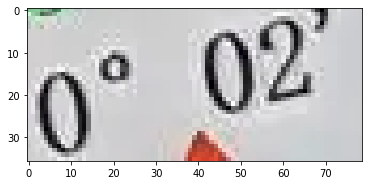

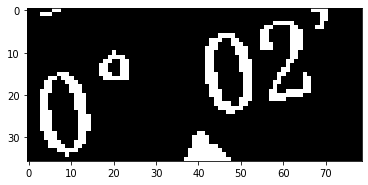

[2022/09/27 04:04:31] ppocr DEBUG: dt_boxes num : 0, elapse : 0.022209882736206055
[2022/09/27 04:04:31] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:04:31] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

[2022/09/27 04:04:31] ppocr DEBUG: dt_boxes num : 0, elapse : 0.023722410202026367
[2022/09/27 04:04:31] ppocr DEBUG: cls num  : 0, elapse : 0
[2022/09/27 04:04:31] ppocr DEBUG: rec_res num  : 0, elapse : 0.0

./crop\mid.png
(423, 130, 3)


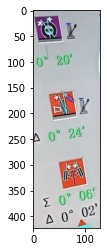

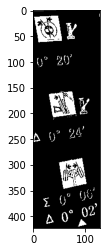

[2022/09/27 04:04:31] ppocr DEBUG: dt_boxes num : 8, elapse : 0.14998984336853027
[2022/09/27 04:04:32] ppocr DEBUG: cls num  : 8, elapse : 0.24246978759765625
[2022/09/27 04:04:43] ppocr DEBUG: rec_res num  : 8, elapse : 11.953995704650879

[[[38.0, 84.0], [74.0, 84.0], [74.0, 109.0], [38.0, 109.0]], ('20', 0.9940631985664368)]

[[[2.0, 90.0], [46.0, 86.0], [48.0, 108.0], [5.0, 112.0]], ('0', 0.5497869849205017)]

[[[19.0, 233.0], [98.0, 222.0], [102.0, 248.0], [23.0, 259.0]], ('0°24', 0.8944063186645508)]

[[[13.0, 362.0], [118.0, 341.0], [123.0, 367.0], [18.0, 388.0]], ('90.03', 0.6964082717895508)]

[[[17.0, 393.0], [123.0, 371.0], [129.0, 401.0], [23.0, 422.0]], ('40°02”', 0.767944872379303)]

[2022/09/27 04:04:44] ppocr DEBUG: dt_boxes num : 5, elapse : 0.09575271606445312
[2022/09/27 04:04:44] ppocr DEBUG: cls num  : 5, elapse : 0.13610434532165527
[2022/09/27 04:04:48] ppocr DEBUG: rec_res num  : 5, elapse : 4.146444797515869

[[[43.0, 85.0], [73.0, 85.0], [73.0, 111.0], [43.0,

In [9]:
for img_path in imgs:
    print(img_path)
    
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    print(np.shape(img))
    plt.imshow(img)
    plt.show()
    
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    plt.imshow(thresh,cmap='gray')
    plt.show()
    
#     pre_img = img_preprocess(img)
#     plt.imshow(pre_img)
#     plt.show()

    result = ocr.ocr(img, cls=True)
    for line in result:
        print()
        print(line)
    print('')
                     
    result = ocr.ocr(thresh, cls=True)
    for line in result:
        print()
        print(line)
    print('')